In [1]:
# Libraries used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from math import sqrt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Upload the file 
Mdata = pd.read_csv('cleaned_earthquake_data.csv')

In [3]:
# Convert 'DateTime' column to datetime dtype
Mdata['DateTime'] = pd.to_datetime(Mdata['DateTime'])
# Filtering the data to include only years up to 2023
Mdata = Mdata[Mdata['DateTime'].dt.year <= 2023]
# Filtering out records with negative magnitudes
Mdata = Mdata[Mdata['mag'] >= 0]
# Filtering the data for valid longitude and latitude values
Mdata = Mdata[(Mdata['longitude'].between(-180, 180)) & (Mdata['latitude'].between(-90, 90))]
# Filtering out outliers in depth (removing values greater than 2000)
Mdata = Mdata[Mdata['depth'] <= 2000]

In [4]:
# Preparing the dataset for machine learning
# For KNN, we will categorize the magnitudes into classes (e.g., 0-1, 1-2, etc.)
df_ml = Mdata.copy()
df_ml['mag_category'] = pd.cut(df_ml['mag'], bins=np.arange(0, 10, 1), labels=np.arange(0, 9, 1))

In [5]:
# Selecting features and target variable
features = ['latitude', 'longitude', 'depth', 'year', 'month', 'day', 'hour', 'minute', 'second']
target_knn = 'mag_category'

In [6]:
# Splitting the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_ml[features], df_ml[target_knn], test_size=0.2, random_state=42)

In [7]:
# Remove rows where the target variable is NaN
train_data = pd.concat([X_train_knn, y_train_knn], axis=1)
train_data = train_data.dropna(subset=['mag_category'])  # Replace 'target_column_name' with the actual name

# Split the data back into features and target variable
X_train_knn = train_data.drop(['mag_category'], axis=1)
y_train_knn = train_data['mag_category']

In [8]:
# Standardizing the features
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

In [9]:
# Remove rows in the test set where the target variable is NaN
X_test_knn = X_test_knn[y_test_knn.notna()]
y_test_knn = y_test_knn[y_test_knn.notna()]

In [10]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_knn, y_train_knn)
knn_predictions = knn.predict(X_test_knn)
knn_accuracy = classification_report(y_test_knn, knn_predictions)

/Users/rahma/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahma/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahma/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [11]:
# Evaluating the models
knn_accuracy = classification_report(y_test_knn, knn_predictions)
print(knn_accuracy)

              precision    recall  f1-score   support

           0       0.22      0.11      0.14       760
           1       0.70      0.88      0.78      6353
           2       0.48      0.39      0.43      2840
           3       0.55      0.30      0.39      1308
           4       0.69      0.29      0.41       218
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.63     11500
   macro avg       0.33      0.25      0.27     11500
weighted avg       0.59      0.63      0.60     11500



/Users/rahma/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahma/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahma/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

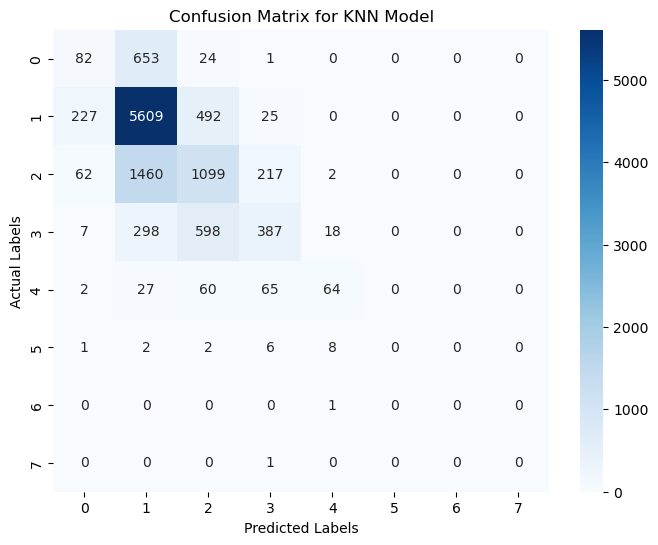

In [12]:
# Adjusting the confusion matrix to match the actual classes in the test data
unique_classes = sorted(y_test_knn.unique())
cm = confusion_matrix(y_test_knn, knn_predictions, labels=unique_classes)
cm_df = pd.DataFrame(cm, index=unique_classes, columns=unique_classes)

# Plotting the adjusted confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for KNN Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [13]:
# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_knn, y_train_knn)

best_knn_params = knn_grid.best_params_
best_knn_score = knn_grid.best_score_

In [14]:
print(best_knn_params)
print(best_knn_score)

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
0.6594801294560994
